<a href="https://colab.research.google.com/github/PeterArbaugh/deep_learning_python/blob/main/ch3_first_steps_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating 2 classes of random points in a 2d plane

In [1]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

# stack both classes into an array
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# generate target labels
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))


Plot the two point clases

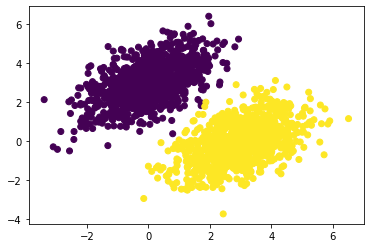

In [2]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c=targets[:, 0])
plt.show()

Creating the linear classifier variables

In [3]:
import tensorflow as tf

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Forward pass function

In [4]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Mean squared error loss function

In [5]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

Training step function

In [6]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

Batch training loop

In [7]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.2625
Loss at step 1: 0.2555
Loss at step 2: 0.1278
Loss at step 3: 0.1048
Loss at step 4: 0.0959
Loss at step 5: 0.0893
Loss at step 6: 0.0835
Loss at step 7: 0.0783
Loss at step 8: 0.0735
Loss at step 9: 0.0691
Loss at step 10: 0.0652
Loss at step 11: 0.0615
Loss at step 12: 0.0583
Loss at step 13: 0.0553
Loss at step 14: 0.0525
Loss at step 15: 0.0500
Loss at step 16: 0.0478
Loss at step 17: 0.0457
Loss at step 18: 0.0438
Loss at step 19: 0.0421
Loss at step 20: 0.0405
Loss at step 21: 0.0391
Loss at step 22: 0.0378
Loss at step 23: 0.0366
Loss at step 24: 0.0356
Loss at step 25: 0.0346
Loss at step 26: 0.0337
Loss at step 27: 0.0329
Loss at step 28: 0.0321
Loss at step 29: 0.0315
Loss at step 30: 0.0308
Loss at step 31: 0.0303
Loss at step 32: 0.0298
Loss at step 33: 0.0293
Loss at step 34: 0.0289
Loss at step 35: 0.0285
Loss at step 36: 0.0281
Loss at step 37: 0.0278
Loss at step 38: 0.0275
Loss at step 39: 0.0273


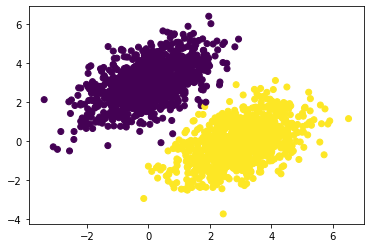

In [8]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0] > 0.5)
plt.show()

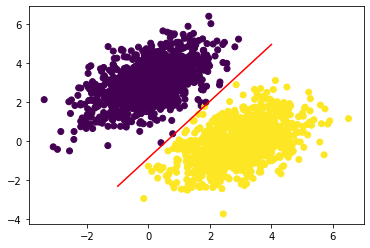

In [9]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0] > 0.5)